# MNIST classification using CNN
## Tensorflow version

# Importing and installing Dependencies

In [ ]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

2023-03-02 14:16:12.783314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 14:16:13.196155: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-02 14:16:13.196187: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-02 14:16:14.298300: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar

<function tensorflow_datasets.core.utils.tqdm_utils.disable_progress_bar()>

In [3]:
import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Importing dataset

In [4]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

2023-03-02 14:16:19.969505: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-02 14:16:19.969536: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-02 14:16:19.969571: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mdh159): /proc/driver/nvidia/version does not exist
2023-03-02 14:16:19.969905: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Exploring data

In [5]:
class_names = metadata.features['label'].names
print("Class names:")
for i,j in enumerate(class_names):
  print(j)

num_train = metadata.splits['train'].num_examples
num_test = metadata.splits['test'].num_examples
print("\nNumber of training examples: {}".format(num_train))
print("Number of test examples: {}".format(num_test))

Class names:
0
1
2
3
4
5
6
7
8
9

Number of training examples: 60000
Number of test examples: 10000


# Preprocessing the dataset

In [6]:
#Each pixel in the image is an integer in range 0 - 255, we normalize it to the range 0 - 1 for the model to work properly
def norm(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(norm)
test_dataset = test_dataset.map(norm)

In [7]:
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

# Exploring processed data

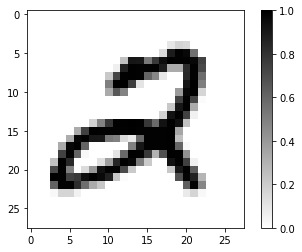

In [ ]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap= plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

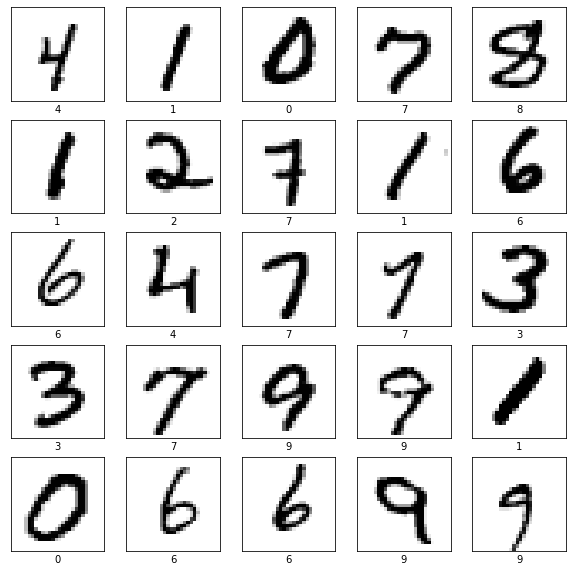

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

# Defining Neural Network

In [8]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28,28,1)),
                             tf.keras.layers.MaxPooling2D((2,2), strides=2),
                             tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D((2,2),strides=2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compiling the model

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training the model

In [10]:
Batch_size = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train).batch(Batch_size)
test_dataset = test_dataset.cache().batch(Batch_size)

In [11]:
model.fit(train_dataset, epochs=3, steps_per_epoch=math.ceil(num_train/Batch_size))

Epoch 1/3
 227/1875 [==>...........................] - ETA: 26s - loss: 0.4241 - accuracy: 0.8659

KeyboardInterrupt: 

## Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test/Batch_size))
print('Accuracy on test dataset: {}'.format(test_accuracy))

313/313 [==============================] - 2s 5ms/step - loss: 0.0379 - accuracy: 0.9878
Accuracy on test dataset: 0.9878000020980835


## Prediction

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([3.94853624e-14, 6.09377826e-11, 1.00000000e+00, 4.91515140e-09,
       1.27867335e-11, 4.52624429e-13, 4.19006769e-14, 8.07979283e-09,
       2.73599654e-09, 3.77763229e-12], dtype=float32)

In [ ]:
np.argmax(predictions[0])

2

In [ ]:
test_labels[0]

2

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

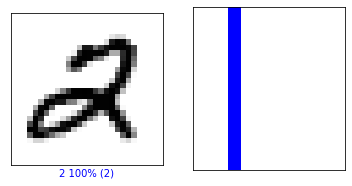

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

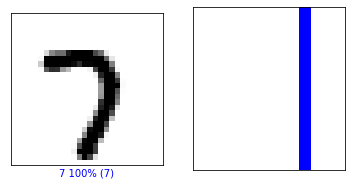

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

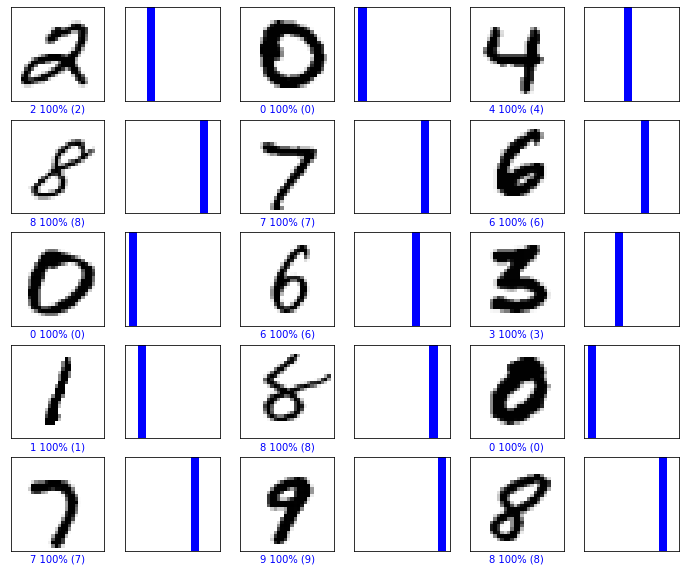

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [ ]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [ ]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.9485511e-14 6.0938012e-11 1.0000000e+00 4.9151514e-09 1.2786758e-11
  4.5262530e-13 4.1900836e-14 8.0798230e-09 2.7360019e-09 3.7776392e-12]]


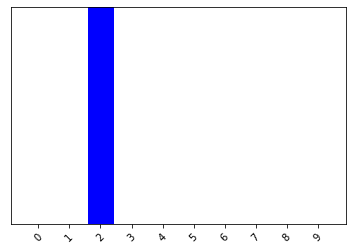

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2